 ### RAS 557 -  PROJECT ASSIGNMENT 2
   TEAM 9- MOHAMED HANIF RAFIUDEEN, THAARUN SIVAKUMAR, MANISH KUMAR PETERI, HARTHIK REDDY CHINTAKUNTA

### INTRODUCTION

For our course project, we've chosen the jerboa, a small bipedal mammal. These creatures have elongated limbs and switch between various gaits. Our aim is to develop a foldable robot that mimics the jerboa's short hopping mechanism. Our primary objective is to design a robotic system capable of performing short hops like jerboa legs, potentially using foldable mechanisms like four-bar linkage and over centering mechanisms in both the legs of the robot.

### MANUFACTURING 

The prototyping and manufacturing process of the robot body has been done using LibreCAD and laser cutting techniques. We used cardstock for the links and a flexible plastic materical for the joint hinges.

We also ran simulations of the robot body in Solidworks, and also designed the mounts for the four servo motors that we used in the construction and movement of the robot within it.

We have made the link between the first servo and second servo to be rigid so we 3D print the joint from servo 1 to servo 2.

For the connection from servo to 4bar we have made a very small slit in the 3D printed part where the laminated cardstock can fit into.

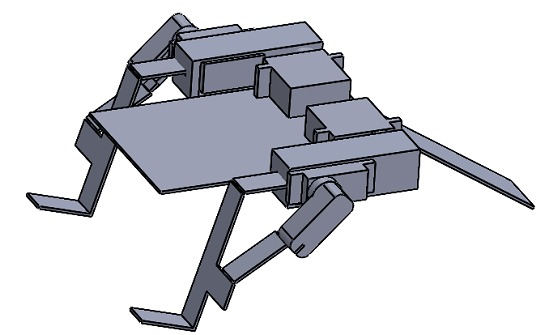

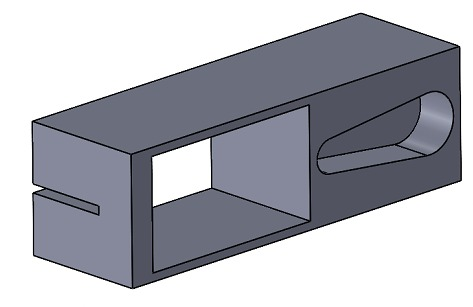

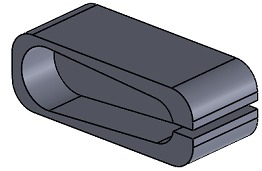


### BODY DESIGN

The body of the robot is designed in such a way that it has a tail at the back that would help the robot in stability and balance of the robot while the main body would stay flat where the servos and the wires are mounted that would actuate the motors in desired direction and degree.

The optimization of the links lengths, joint stiffness and thickness has been done through mutilple iteration of Solidworks and Mujoco simulations.

The dimenisons of the body design are as follows:

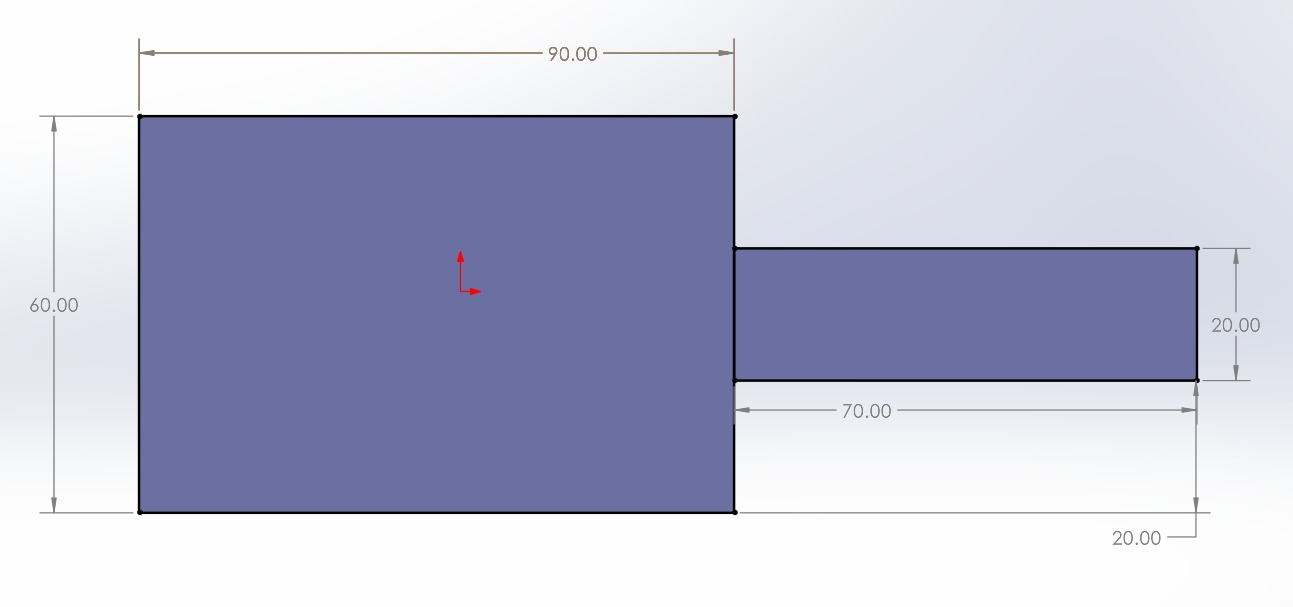

In [1]:
import foldable_robotics.dxf as frd
import foldable_robotics as fr
import foldable_robotics.manufacturing as frm
from foldable_robotics.layer import Layer
from foldable_robotics.laminate import Laminate
import foldable_robotics.parts.castellated_hinge2 as frc
import shapely.geometry as sg

In [2]:
fr.display_height=300

In [3]:
fr.resolution = 4

In [4]:
desired_degrees = 120
thickness = 1
plain_width = frm.plain_hinge_width(desired_degrees, thickness)
plain_width

1.7320508075688774

In [5]:
support_width = 2 #must be larger than hinge width
kerf = .05
is_adhesive = [False,True,False,True,False]
arc_approx = 10
NUM_LAYERS = 5
bridge_thickness = 2
bounding_box_padding = 10

jig_spacing = 10
jig_dia = 5

In [6]:
body_vertices = frd.read_lwpolylines('body_tail_6.dxf', layer='body', arc_approx = arc_approx)
body_vertices

[[[240.0, 580.0],
  [330.0, 580.0],
  [330.0, 560.0],
  [400.0, 560.0],
  [400.0, 540.0],
  [330.0, 540.0],
  [330.0, 520.0],
  [240.0, 520.0]]]

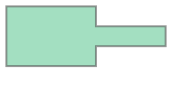

In [7]:
body_polygons = [sg.Polygon(item) for item in body_vertices]
body_polygons[0]

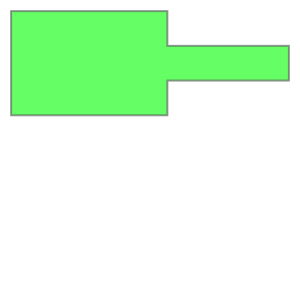

In [8]:
body_layer = Layer(*body_polygons)
body_layer

In [9]:
hole_vertices = frd.read_lwpolylines('body_tail_6.dxf', layer='holes', arc_approx = arc_approx)
hole_layer = Layer(*[sg.Polygon(item) for item in hole_vertices])
hole_layer

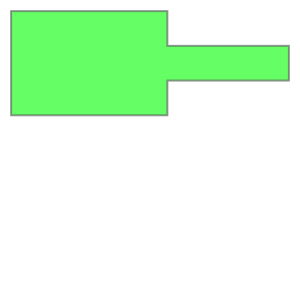

In [10]:
body_layer -=hole_layer
body_layer

In [11]:
cut_vertices = frd.read_lwpolylines('body_tail_6.dxf', layer='cuts', arc_approx = arc_approx)
cut_layer = Layer(*[sg.LineString(item) for item in cut_vertices])
cut_layer

In [12]:
cut_layer <<=.5
cut_layer

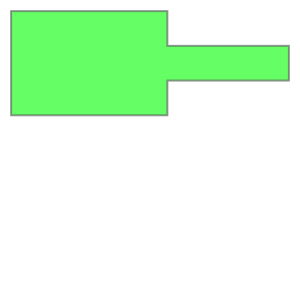

In [13]:
body_layer -= cut_layer
body_layer

In [14]:
joint_vertices = frd.read_lines('body_tail_6.dxf', layer='joints')
joint_vertices

[[[330.0, 590.0], [330.0, 510.0]]]

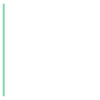

In [15]:
l = sg.LineString(joint_vertices[0])
l

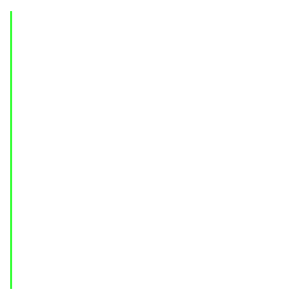

In [16]:
joint_lines_original_layer = Layer(*[sg.LineString(item) for item in joint_vertices])
joint_lines_original_layer

C:\Users\Thaarun\anaconda3\envs\mujoco\Lib\site-packages\foldable_robotics\layer.py:335: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.axis([d[0],e[0],d[1],e[1]])


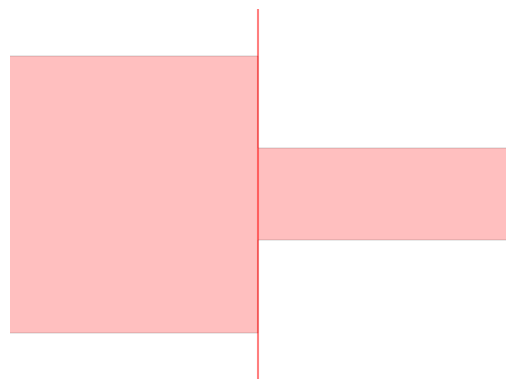

In [17]:
body_layer.plot()
joint_lines_original_layer.plot()

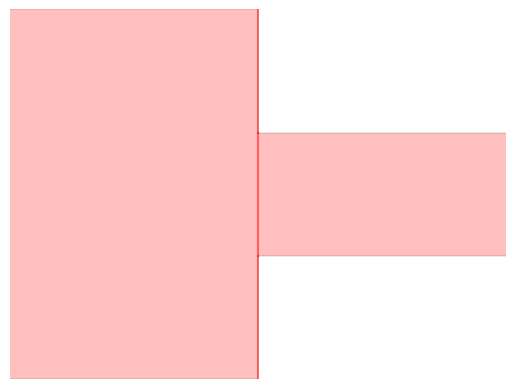

In [18]:
joint_lines_modified_layer = joint_lines_original_layer & body_layer
body_layer.plot()
joint_lines_modified_layer.plot()

In [19]:
modified_joint_vertices = [list(item.coords) for item in joint_lines_modified_layer.geoms]
modified_joint_vertices

[[(330.0, 580.0), (330.0, 560.0)],
 [(330.0, 560.0), (330.0, 540.0)],
 [(330.0, 540.0), (330.0, 520.0)]]

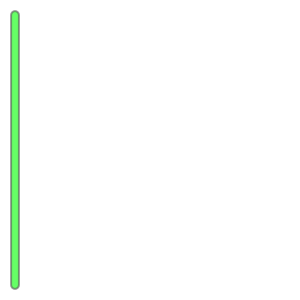

In [20]:
simple_joint_layer = joint_lines_modified_layer << plain_width/2
simple_joint_layer

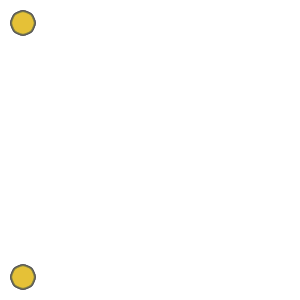

<Figure size 640x480 with 0 Axes>

In [21]:
hole,dummy = frm.calc_hole(modified_joint_vertices,plain_width/2)
fr.my_line_width=0
holes = hole.to_laminate(NUM_LAYERS)
holes<<=.5 
holes

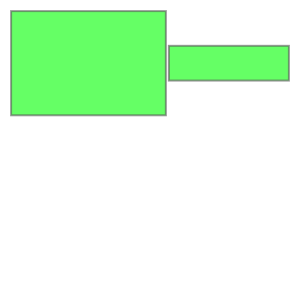

In [22]:
rigid_layer = (body_layer - simple_joint_layer)
rigid_layer

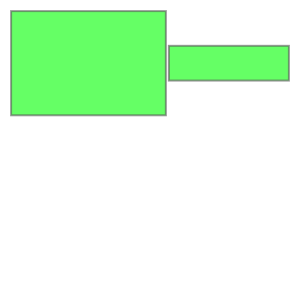

In [23]:
adhesive_layer = rigid_layer & body_layer
adhesive_layer

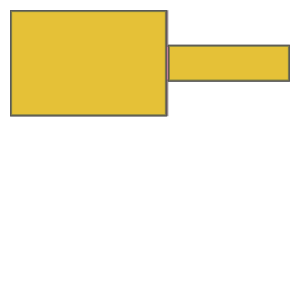

In [24]:
ideal_final_device = Laminate(rigid_layer,adhesive_layer, body_layer, adhesive_layer,rigid_layer)
ideal_final_device

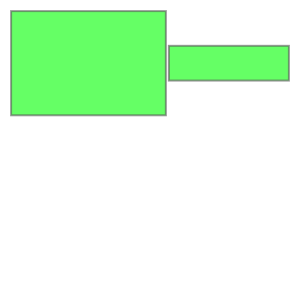

In [25]:
ideal_final_device[0]

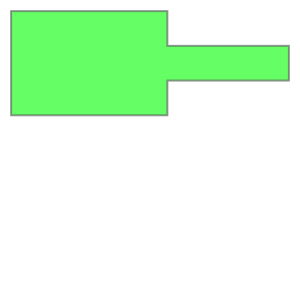

In [26]:
ideal_final_device[2]

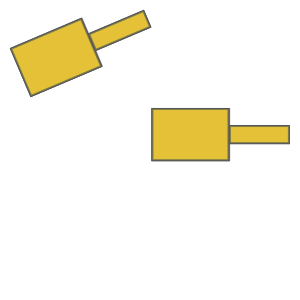

In [27]:
ideal_final_device | ideal_final_device.rotate(23).translate(80,23)

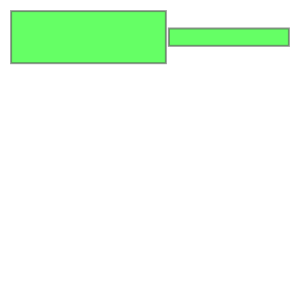

In [28]:
ideal_final_device[0].scale(2,1)

In [29]:
bridges = frd.read_lines('body_tail_6.dxf', layer='bridge')
bridges

[[[250.0, 590.0], [250.0, 510.0]],
 [[290.0, 550.0], [370.0, 550.0]],
 [[390.0, 570.0], [390.0, 530.0]]]

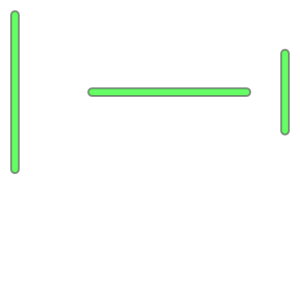

In [30]:
bridges_layer = Layer(*[sg.LineString(item) for item in bridges])
bridges_layer <<= bridge_thickness
bridges_layer

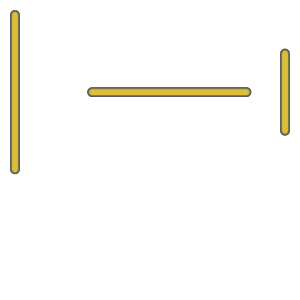

In [31]:
bridges_lam = Laminate(bridges_layer,bridges_layer,Layer(),bridges_layer,bridges_layer)
bridges_lam

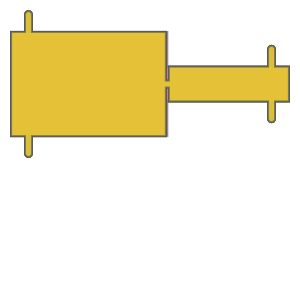

In [32]:
supported_actual_device = ideal_final_device | bridges_lam
supported_actual_device

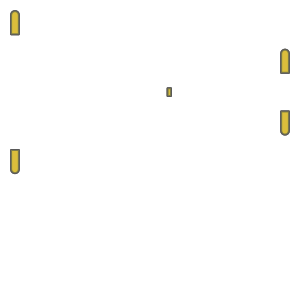

In [33]:
diff = supported_actual_device - ideal_final_device
removal = frm.cleanup(diff, .1)
removal

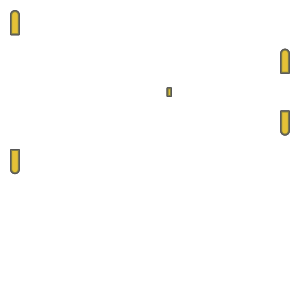

In [34]:
removal = frm.keepout_laser(removal)
removal

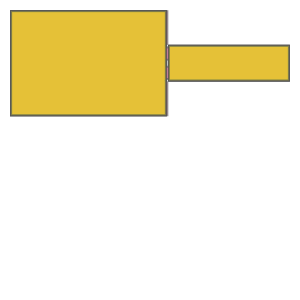

In [35]:
actual_final_device = ideal_final_device- holes - removal
actual_final_device

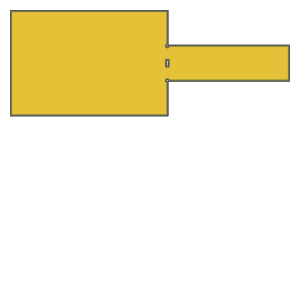

In [36]:
keepout = frm.keepout_laser(actual_final_device)
keepout

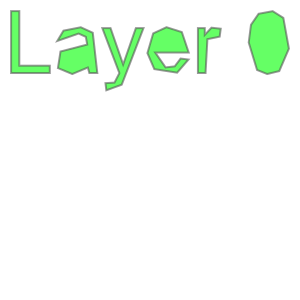

In [37]:
layer_id = frm.build_layer_numbers(NUM_LAYERS, text_size=jig_dia)
layer_id = layer_id.simplify(.2)
layer_id[0]

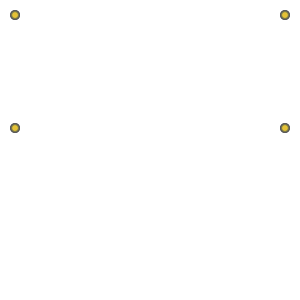

In [38]:
(x1,y1),(x2,y2) = actual_final_device.bounding_box_coords()
w1,h1 = actual_final_device.get_dimensions()
w2 = round(w1/jig_spacing)*jig_spacing+jig_spacing+support_width
h2 = round(h1/jig_spacing)*jig_spacing+jig_spacing+support_width

x1 -= (w2-w1)/2
y1 -= (h2-h1)/2
x2 += (w2-w1)/2
y2 += (h2-h1)/2

points = []
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))

alignment_holes_layer = Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes

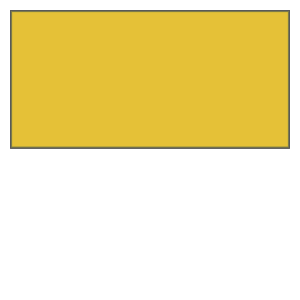

In [39]:
sheet_layer = (alignment_holes_layer<<bounding_box_padding).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet

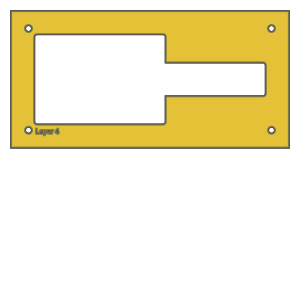

In [40]:
removable_scrap = frm.calculate_removable_scrap(actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap-alignment_holes-layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

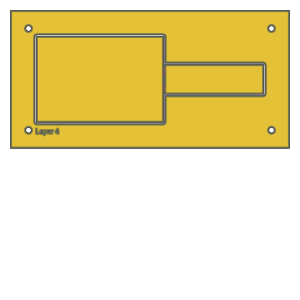

In [41]:
(web|actual_final_device)

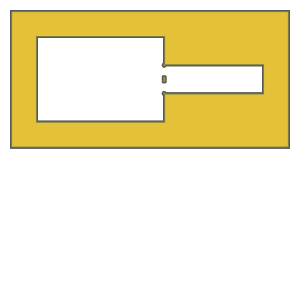

In [42]:
second_pass_scrap = sheet-keepout
second_pass_scrap

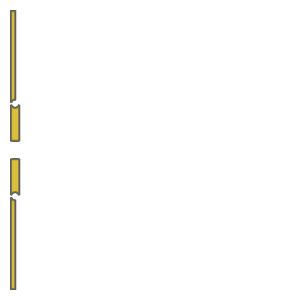

In [43]:
first_pass_scrap = sheet - second_pass_scrap - actual_final_device
first_pass_scrap = frm.cleanup(first_pass_scrap, .00001)
first_pass_scrap

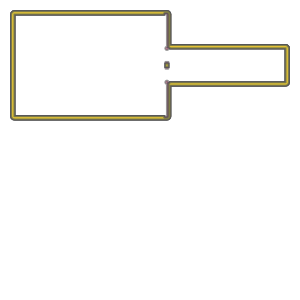

In [44]:
support = frm.support(actual_final_device,frm.keepout_laser,support_width,support_width/2)
support

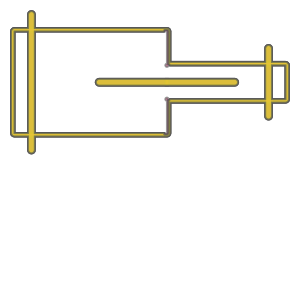

In [45]:
support | bridges_lam

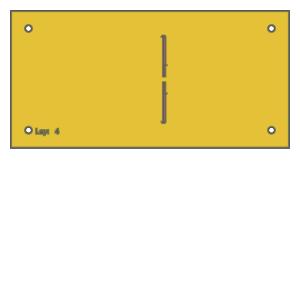

In [46]:
supported_design = web|actual_final_device|support| bridges_lam
supported_design

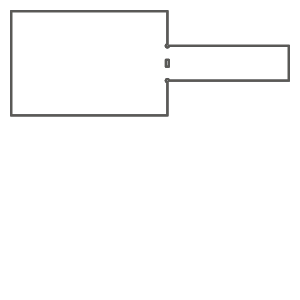

In [47]:
cut_material = (keepout<<kerf)-keepout
cut_material

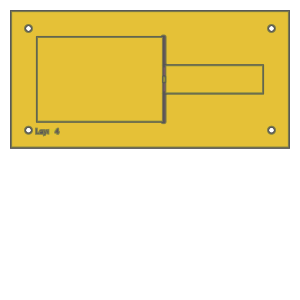

In [48]:
remaining_material = supported_design-cut_material
remaining_material

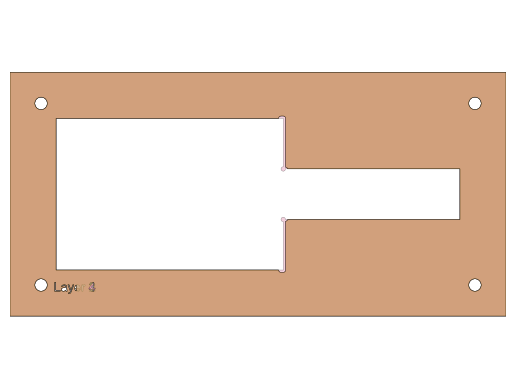

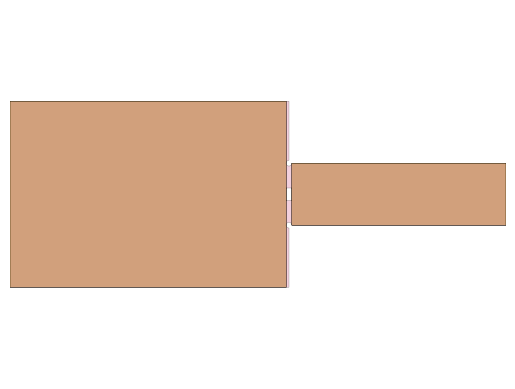

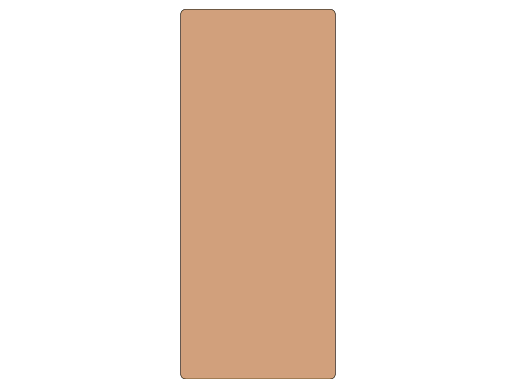

In [49]:
remaining_parts = frm.find_connected(remaining_material,is_adhesive)
for item in remaining_parts:
    item.plot(new=True)

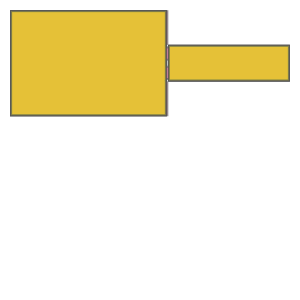

In [50]:
test_part=actual_final_device>>1
for result in remaining_parts:
    if not (result&test_part).is_null():
        break
result

In [51]:
check = (result^actual_final_device)
check>>=1e-1
assert(check.is_null())

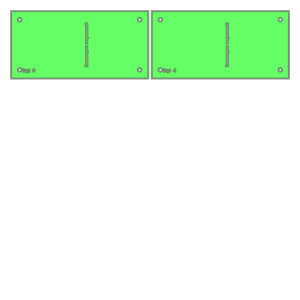

In [52]:
w,h = supported_design.get_dimensions()
p0,p1 = supported_design.bounding_box_coords()
rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
rigid_layer

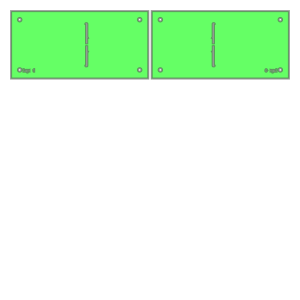

In [53]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+w+5,p0[1]-p2[1])
adhesive_layer = supported_design[1] | l4
adhesive_layer

In [54]:
first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
first_pass.export_dxf('first_pass')

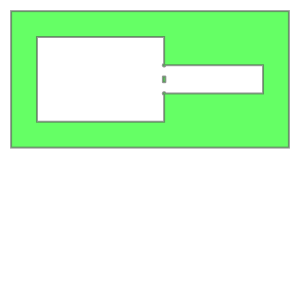

In [55]:
final_cut = sheet - keepout
final_cut = final_cut[0]
final_cut.export_dxf('final_cut')
final_cut

1.7320508075688774 1.7320508075688774 0.577350269189626


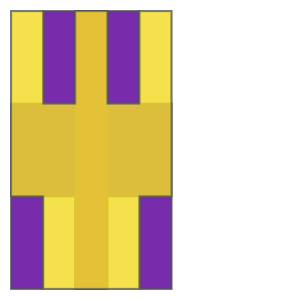

In [56]:
castellated_width,castellated_gap = frm.castellated_hinge_width(desired_degrees,thickness)
print(plain_width,castellated_gap,castellated_width)
hinge = frc.generate(castellated_gap,castellated_width)
hinge

In [57]:
support_width = 1

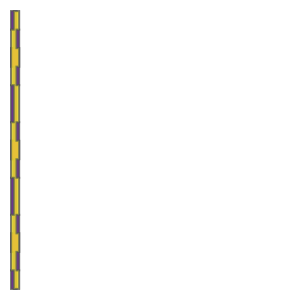

In [58]:
 lam =Layer().to_laminate(len(hinge))
 all_hinges= []
 for p3,p4 in modified_joint_vertices:
     all_hinges.append(hinge.map_line_stretch((0,0),(1,0),p3,p4))
 all_hinges= lam.unary_union(*all_hinges)
 all_hinges

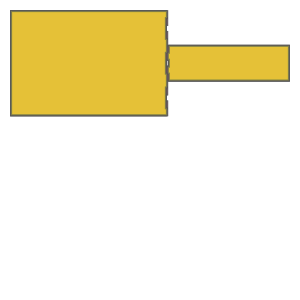

In [59]:
 actual_final_device =Laminate(body_layer,body_layer,body_layer,body_layer,body_layer)
 actual_final_device-=all_hinges
 actual_final_device

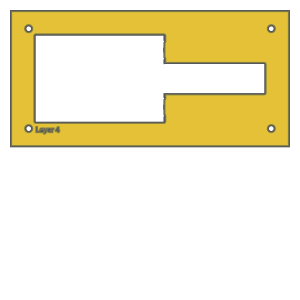

In [60]:
layer_id= frm.build_layer_numbers(NUM_LAYERS,text_size=jig_dia)
layer_id= layer_id.simplify(.2)

(x1,y1),(x2,y2) = actual_final_device.bounding_box_coords()
w1,h1= actual_final_device.get_dimensions()
w2= round(w1/jig_spacing)*jig_spacing+jig_spacing
h2= round(h1/jig_spacing)*jig_spacing+jig_spacing
x1-=(w2-w1)/2
y1-=(h2-h1)/2
x2+=(w2-w1)/2
y2+=(h2-h1)/2

points =[]
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))

alignment_holes_layer= Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes

sheet_layer =(alignment_holes_layer<<10).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet

removable_scrap = frm.calculate_removable_scrap( actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap- alignment_holes- layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

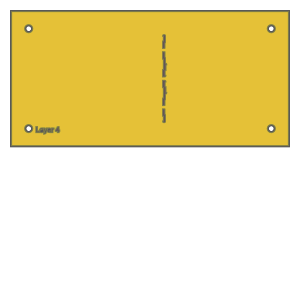

In [61]:
 keepout = frm.keepout_laser(actual_final_device)
 second_pass_scrap = sheet-keepout

 first_pass_scrap = sheet- actual_final_device- second_pass_scrap
 first_pass_scrap = frm.cleanup(first_pass_scrap,.00001)

 support = frm.support(actual_final_device,frm.keepout_laser,support_width,support_width/2)

 supported_design = web|actual_final_device|support
 supported_design

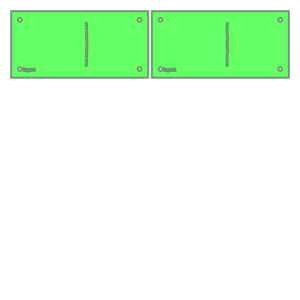

In [62]:
 w,h = supported_design.get_dimensions()
 p0,p1 = supported_design.bounding_box_coords()
 rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
 rigid_layer

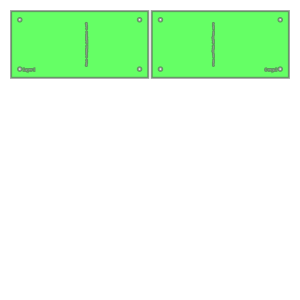

In [63]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+5+w,p0[1]-p2[1])

adhesive_layer = supported_design[1] | l4
adhesive_layer

In [64]:
 first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
 first_pass.export_dxf('first_pass2-')


In [65]:
 final_cut = sheet- keepout
 final_cut = final_cut[0]

In [66]:
 final_cut.export_dxf('final_cut2')

In [67]:
 from foldable_robotics.pdf import Page
 import foldable_robotics.pdf as frp

final_cut_scaled=final_cut.scale(frp.ppi/25.4,frp.ppi/25.4)
p=Page('final_cut.pdf')
for item in final_cut_scaled.get_paths():
    p.draw_poly(item)
p.close()

### LEG DESIGN

The leg is designed in a way such that it incoporates both over centering mechanism and four-bar linkage meachanism. Both the motors on each leg are part of the four-bar mechanism each acting as a link within the mechanism that would actuate the leg to a desired degree and direction.

The optimization of the links lengths, joint stiffness, joint thickness and the movement of the four-bar linkage and over centering mechanism has been done through mutilple iteration of Solidworks and Mujoco simulations. For the optimization of the links lengths and the velocity generated we used a python code given under end effector velocity.

The dimenisons of the leg design are as follows:

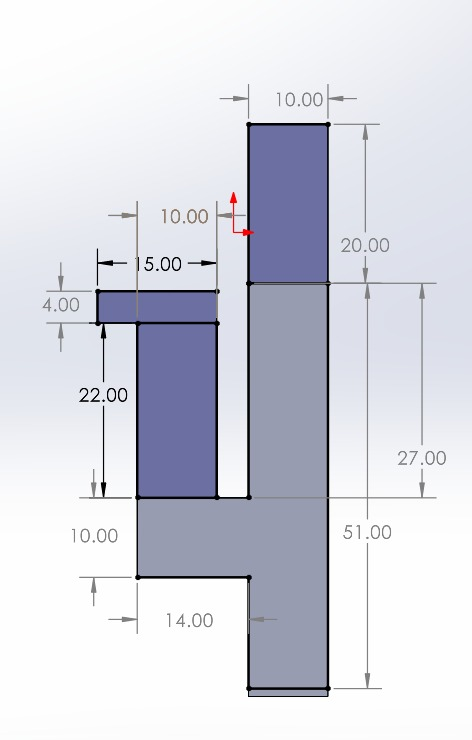

In [68]:
import foldable_robotics.dxf as frd
import foldable_robotics as fr
import foldable_robotics.manufacturing as frm
from foldable_robotics.layer import Layer
from foldable_robotics.laminate import Laminate
import foldable_robotics.parts.castellated_hinge2 as frc
import shapely.geometry as sg

In [69]:
fr.display_height=300

In [70]:
fr.resolution = 4

In [71]:
desired_degrees = 90
thickness = 1
plain_width = frm.plain_hinge_width(desired_degrees, thickness)
plain_width

1.0000000000000002

In [72]:
support_width = 1.25 #must be larger than hinge width
kerf = .05
is_adhesive = [False,True,False,True,False]
arc_approx = 10
NUM_LAYERS = 5
bridge_thickness = 0.75
bounding_box_padding = 10

jig_spacing = 10
jig_dia = 5

In [73]:
body_vertices = frd.read_lwpolylines('leg_design_5.dxf', layer='body', arc_approx = arc_approx)
body_vertices

[[[0.0, 0.0],
  [-14.0, 0.0],
  [-14.0, -32.0],
  [-19.0, -32.0],
  [-19.0, -36.0],
  [-4.0, -36.0],
  [-4.0, -10.0],
  [0.0, -10.0],
  [0.0, -57.0],
  [10.0, -57.0],
  [10.0, 30.0],
  [0.0, 30.0]]]

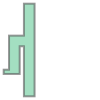

In [74]:
body_polygons = [sg.Polygon(item) for item in body_vertices]
body_polygons[0]

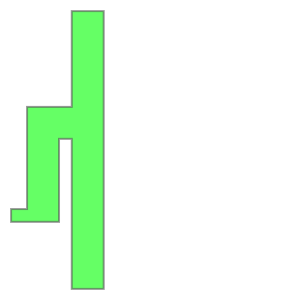

In [75]:
body_layer = Layer(*body_polygons)
body_layer

In [76]:
hole_vertices = frd.read_lwpolylines('leg_design_5.dxf', layer='holes', arc_approx = arc_approx)
hole_layer = Layer(*[sg.Polygon(item) for item in hole_vertices])
hole_layer

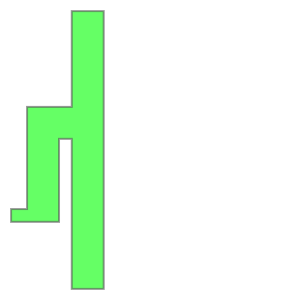

In [77]:
body_layer -=hole_layer
body_layer

In [78]:
cut_vertices = frd.read_lwpolylines('leg_design_5.dxf', layer='cuts', arc_approx = arc_approx)
cut_layer = Layer(*[sg.LineString(item) for item in cut_vertices])
cut_layer

In [79]:
cut_layer <<=.5
cut_layer

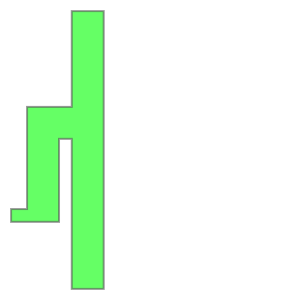

In [80]:
body_layer -= cut_layer
body_layer

In [81]:
joint_vertices = frd.read_lines('leg_design_5.dxf', layer='joints')
joint_vertices

[[[-4.0, -32.0], [-14.0, -32.0]],
 [[-4.0, -10.0], [-14.0, -10.0]],
 [[-1.0, -37.0], [11.0, -37.0]]]

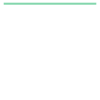

In [82]:
l = sg.LineString(joint_vertices[0])
l

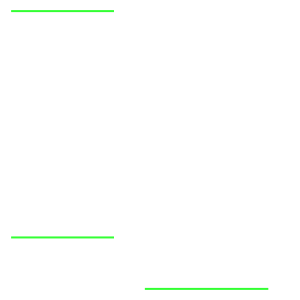

In [83]:
joint_lines_original_layer = Layer(*[sg.LineString(item) for item in joint_vertices])
joint_lines_original_layer

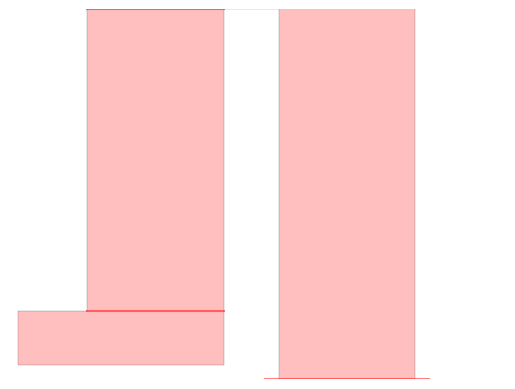

In [84]:
body_layer.plot()
joint_lines_original_layer.plot()

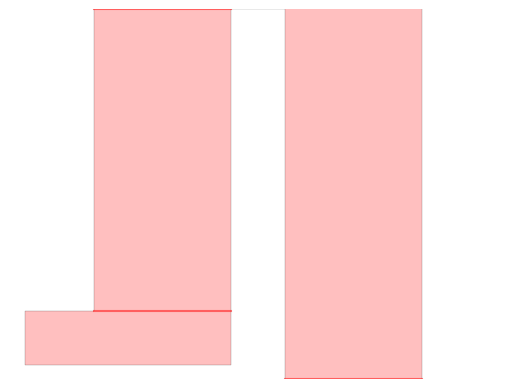

In [85]:
joint_lines_modified_layer = joint_lines_original_layer & body_layer
body_layer.plot()
joint_lines_modified_layer.plot()

In [86]:
modified_joint_vertices = [list(item.coords) for item in joint_lines_modified_layer.geoms]
modified_joint_vertices

[[(-4.0, -32.0), (-14.0, -32.0)],
 [(-4.0, -10.0), (-14.0, -10.0)],
 [(0.0, -37.0), (10.0, -37.0)]]

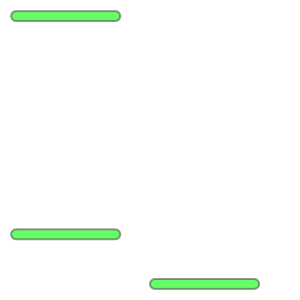

In [87]:
simple_joint_layer = joint_lines_modified_layer << plain_width/2
simple_joint_layer

In [88]:
hole,dummy = frm.calc_hole(modified_joint_vertices,plain_width/2)
fr.my_line_width=0
holes = hole.to_laminate(NUM_LAYERS)
holes<<=.5 
holes

<Figure size 640x480 with 0 Axes>

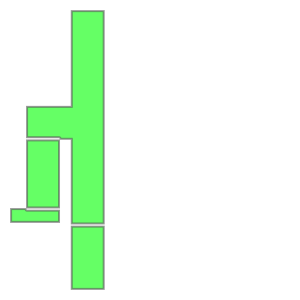

In [89]:
rigid_layer = (body_layer - simple_joint_layer)
rigid_layer

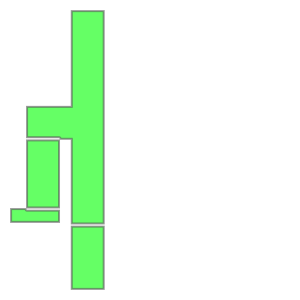

In [90]:
adhesive_layer = rigid_layer & body_layer
adhesive_layer

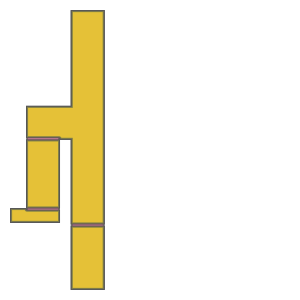

In [91]:
ideal_final_device = Laminate(rigid_layer,adhesive_layer, body_layer, adhesive_layer,rigid_layer)
ideal_final_device

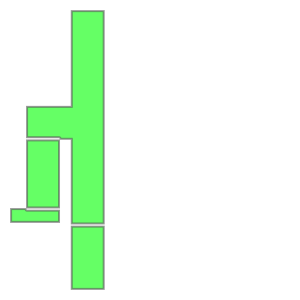

In [92]:
ideal_final_device[0]

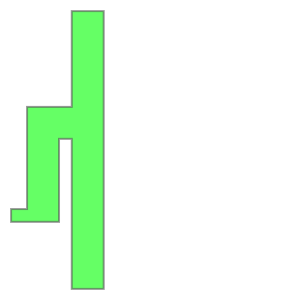

In [93]:
ideal_final_device[2]

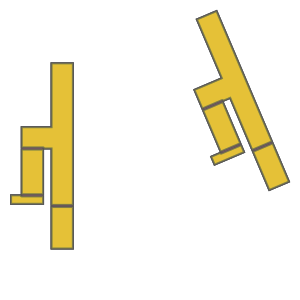

In [94]:
ideal_final_device | ideal_final_device.rotate(23).translate(80,23)

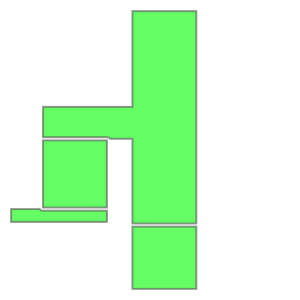

In [95]:
ideal_final_device[0].scale(2,1)

In [96]:
bridges = frd.read_lines('leg_design_5.dxf', layer='bridge')
bridges

[[[5.0, -35.0], [5.0, -39.0]],
 [[-9.0, -7.0], [-9.0, -12.0]],
 [[-9.0, -30.0], [-9.0, -34.0]],
 [[-2.0, 21.0], [12.0, 21.0]]]

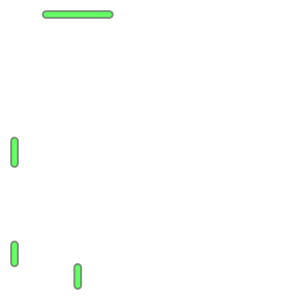

In [97]:
bridges_layer = Layer(*[sg.LineString(item) for item in bridges])
bridges_layer <<= bridge_thickness
bridges_layer

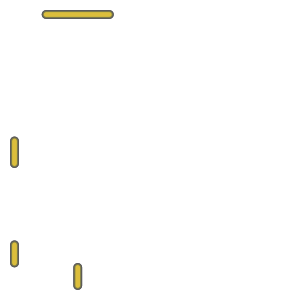

In [98]:
bridges_lam = Laminate(bridges_layer,bridges_layer,Layer(),bridges_layer,bridges_layer)
bridges_lam

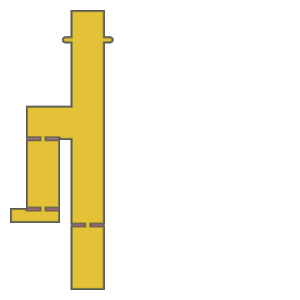

In [99]:
supported_actual_device = ideal_final_device | bridges_lam
supported_actual_device

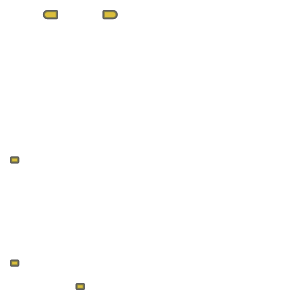

In [100]:
diff = supported_actual_device - ideal_final_device
removal = frm.cleanup(diff, .1)
removal

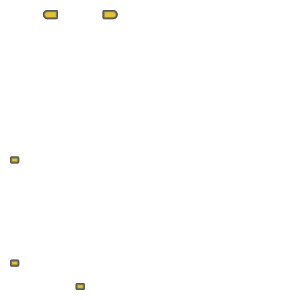

In [101]:
removal = frm.keepout_laser(removal)
removal

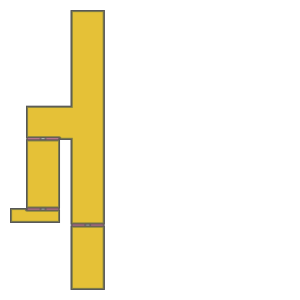

In [102]:
actual_final_device = ideal_final_device- holes - removal
actual_final_device

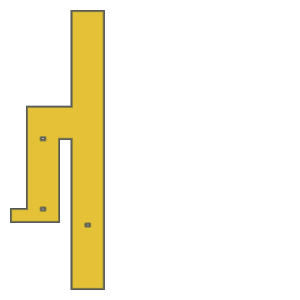

In [103]:
keepout = frm.keepout_laser(actual_final_device)
keepout

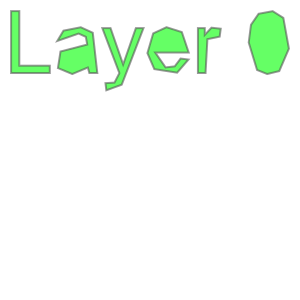

In [104]:
layer_id = frm.build_layer_numbers(NUM_LAYERS, text_size=jig_dia)
layer_id = layer_id.simplify(.2)
layer_id[0]

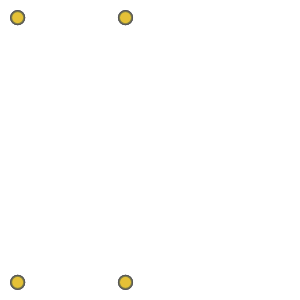

In [105]:
(x1,y1),(x2,y2) = actual_final_device.bounding_box_coords()
w1,h1 = actual_final_device.get_dimensions()
w2 = round(w1/jig_spacing)*jig_spacing+jig_spacing+support_width
h2 = round(h1/jig_spacing)*jig_spacing+jig_spacing+support_width

x1 -= (w2-w1)/2
y1 -= (h2-h1)/2
x2 += (w2-w1)/2
y2 += (h2-h1)/2

points = []
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))

alignment_holes_layer = Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes

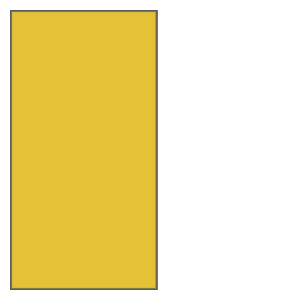

In [106]:
sheet_layer = (alignment_holes_layer<<bounding_box_padding).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet

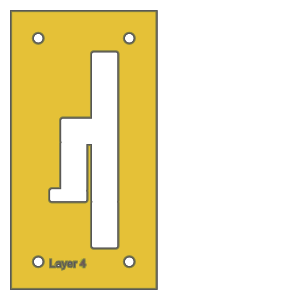

In [107]:
removable_scrap = frm.calculate_removable_scrap(actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap-alignment_holes-layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

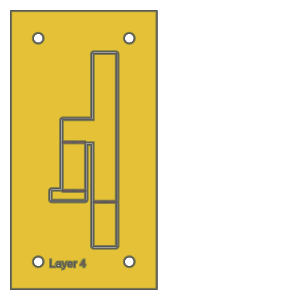

In [108]:
(web|actual_final_device)

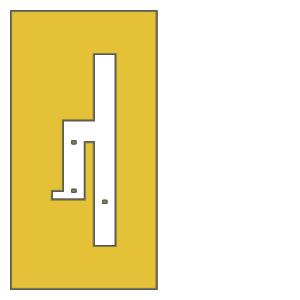

In [109]:
second_pass_scrap = sheet-keepout
second_pass_scrap

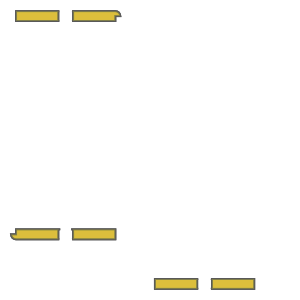

In [110]:
first_pass_scrap = sheet - second_pass_scrap - actual_final_device
first_pass_scrap = frm.cleanup(first_pass_scrap, .00001)
first_pass_scrap

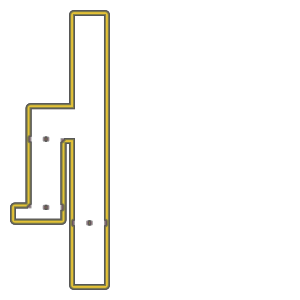

In [111]:
support = frm.support(actual_final_device,frm.keepout_laser,support_width,support_width/2)
support

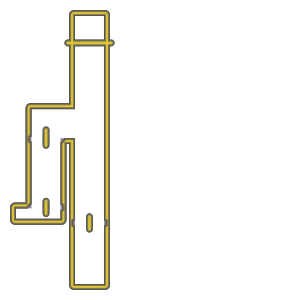

In [112]:
support | bridges_lam

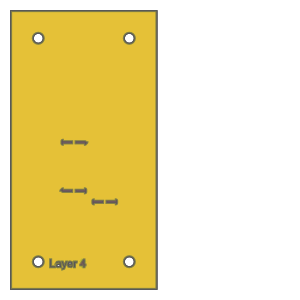

In [113]:
supported_design = web|actual_final_device|support| bridges_lam
supported_design

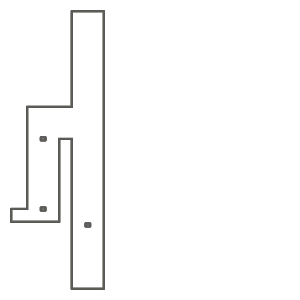

In [114]:
cut_material = (keepout<<kerf)-keepout
cut_material

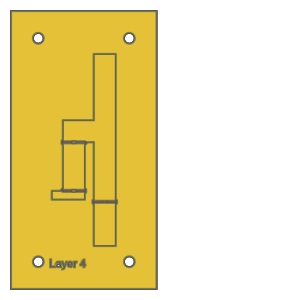

In [115]:
remaining_material = supported_design-cut_material
remaining_material

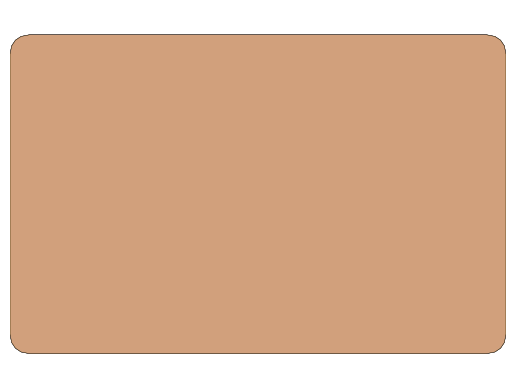

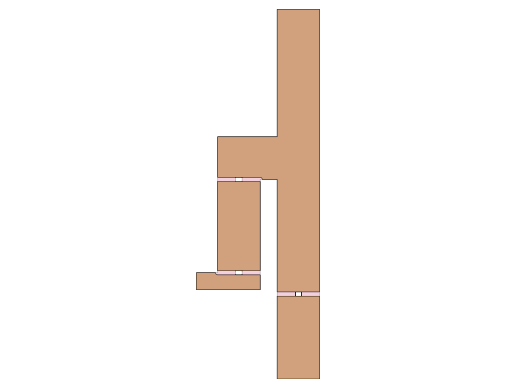

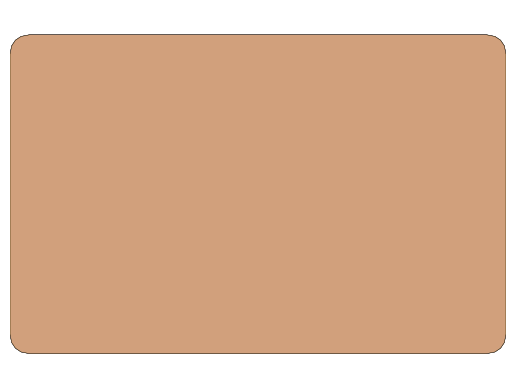

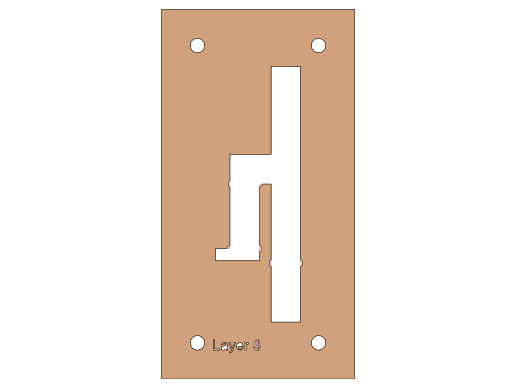

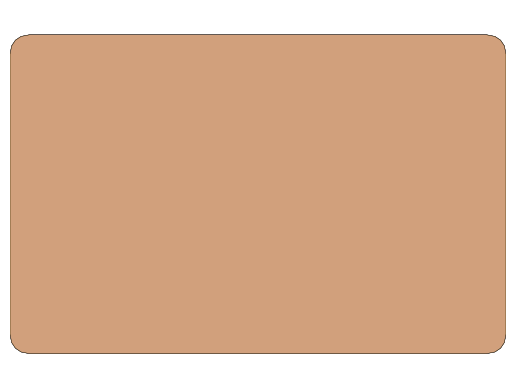

In [116]:
remaining_parts = frm.find_connected(remaining_material,is_adhesive)
for item in remaining_parts:
    item.plot(new=True)

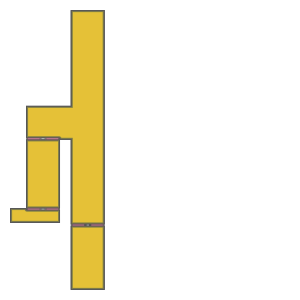

In [117]:
test_part=actual_final_device>>1
for result in remaining_parts:
    if not (result&test_part).is_null():
        break
result

In [118]:
check = (result^actual_final_device)
check>>=1e-1
assert(check.is_null())

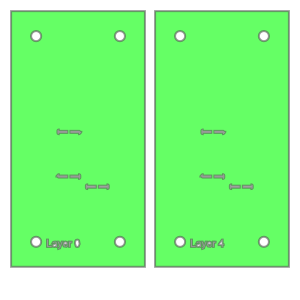

In [119]:
w,h = supported_design.get_dimensions()
p0,p1 = supported_design.bounding_box_coords()
rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
rigid_layer

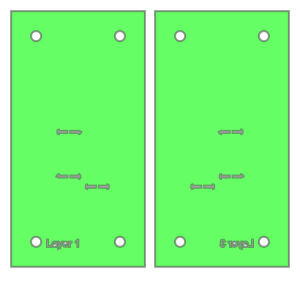

In [120]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+w+5,p0[1]-p2[1])
adhesive_layer = supported_design[1] | l4
adhesive_layer

In [121]:
first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
first_pass.export_dxf('first_pass')

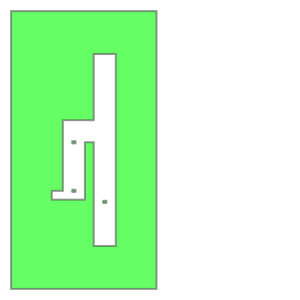

In [122]:
final_cut = sheet - keepout
final_cut = final_cut[0]
final_cut.export_dxf('final_cut')
final_cut

1.0000000000000002 1.0 0


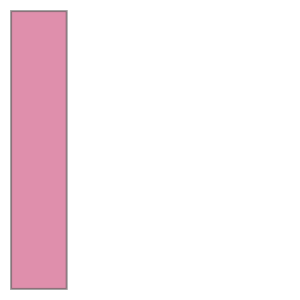

In [123]:
castellated_width,castellated_gap = frm.castellated_hinge_width(desired_degrees,thickness)
print(plain_width,castellated_gap,castellated_width)
hinge = frc.generate(castellated_gap,castellated_width)
hinge

In [124]:
support_width = 1

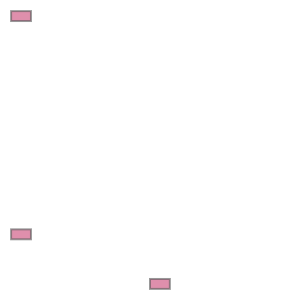

In [125]:
 lam =Layer().to_laminate(len(hinge))
 all_hinges= []
 for p3,p4 in modified_joint_vertices:
     all_hinges.append(hinge.map_line_stretch((0,0),(1,0),p3,p4))
 all_hinges= lam.unary_union(*all_hinges)
 all_hinges

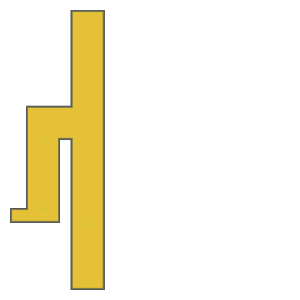

In [126]:
 actual_final_device =Laminate(body_layer,body_layer,body_layer,body_layer,body_layer)
 actual_final_device-=all_hinges
 actual_final_device

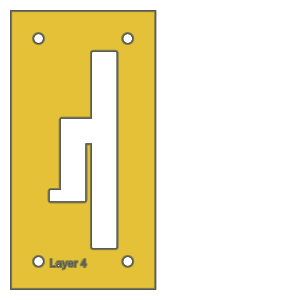

In [127]:
layer_id= frm.build_layer_numbers(NUM_LAYERS,text_size=jig_dia)
layer_id= layer_id.simplify(.2)

(x1,y1),(x2,y2) = actual_final_device.bounding_box_coords()
w1,h1= actual_final_device.get_dimensions()
w2= round(w1/jig_spacing)*jig_spacing+jig_spacing
h2= round(h1/jig_spacing)*jig_spacing+jig_spacing
x1-=(w2-w1)/2
y1-=(h2-h1)/2
x2+=(w2-w1)/2
y2+=(h2-h1)/2

points =[]
points.append(sg.Point(x1,y1))
points.append(sg.Point(x2,y1))
points.append(sg.Point(x1,y2))
points.append(sg.Point(x2,y2))

alignment_holes_layer= Layer(*points)
alignment_holes_layer<<=(jig_dia/2)
alignment_holes=alignment_holes_layer.to_laminate(NUM_LAYERS)
alignment_holes

sheet_layer =(alignment_holes_layer<<10).bounding_box()
sheet=sheet_layer.to_laminate(NUM_LAYERS)
sheet

removable_scrap = frm.calculate_removable_scrap( actual_final_device,sheet,support_width,is_adhesive)
web = removable_scrap- alignment_holes- layer_id.translate(x1+jig_dia,y1-jig_dia/2)
web

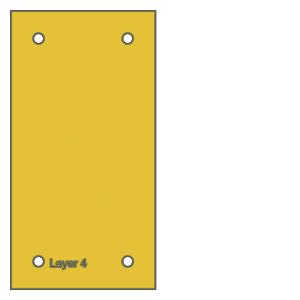

In [128]:
 keepout = frm.keepout_laser(actual_final_device)
 second_pass_scrap = sheet-keepout

 first_pass_scrap = sheet- actual_final_device- second_pass_scrap
 first_pass_scrap = frm.cleanup(first_pass_scrap,.00001)

 support = frm.support(actual_final_device,frm.keepout_laser,support_width,support_width/2)

 supported_design = web|actual_final_device|support
 supported_design

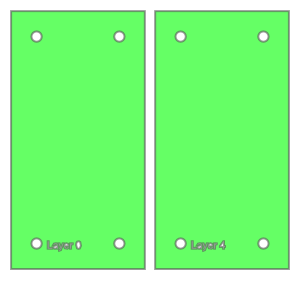

In [129]:
 w,h = supported_design.get_dimensions()
 p0,p1 = supported_design.bounding_box_coords()
 rigid_layer = supported_design[0] | (supported_design[-1].translate(w+5,0))
 rigid_layer

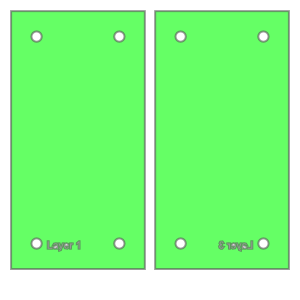

In [130]:
l4 = supported_design[3].scale(-1,1)
p2,p3 = l4.bounding_box_coords()
l4 = l4.translate(p0[0]-p2[0]+5+w,p0[1]-p2[1])

adhesive_layer = supported_design[1] | l4
adhesive_layer

In [131]:
 first_pass = Laminate(rigid_layer,adhesive_layer,supported_design[2])
 first_pass.export_dxf('first_pass2-')

In [132]:
 final_cut = sheet- keepout
 final_cut = final_cut[0]

In [133]:
 final_cut.export_dxf('final_cut2')

In [134]:
 from foldable_robotics.pdf import Page
 import foldable_robotics.pdf as frp

final_cut_scaled=final_cut.scale(frp.ppi/25.4,frp.ppi/25.4)
p=Page('final_cut.pdf')
for item in final_cut_scaled.get_paths():
    p.draw_poly(item)
p.close()

### KINEMATIC MODEL

In [135]:
import numpy as np
import math
from math import pi
import sympy as sp
import matplotlib.pyplot as plt

a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
d = sp.Symbol('d')
l1 = sp.Symbol('l1')
l2 = sp.Symbol('l2')
q1 = sp.Symbol('q1')
q2 = sp.Symbol('q2')
th1 = sp.Symbol('th1')
th2 = sp.Symbol('th2')

In [136]:
class Quaternion(object):
    def __init__(self,a,b,c,d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    def __add__(self,other):
        a = self.a+other.a
        b = self.b+other.b
        c = self.c+other.c
        d = self.d+other.d
        new = Quaternion(a,b,c,d)
        return new
    def __mul__(self,other):
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        e = other.a
        f = other.b
        g = other.c
        h = other.d
        return Quaternion(a*e-b*f-c*g-d*h, a*f+b*e+c*h-d*g, a*g-b*h+c*e+d*f, a*h+b*g-c*f+d*e)
    def conj(self):
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        inverse_q = Quaternion(a,-b,-c,-d)
        return inverse_q
    def magnitude(self):
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        q = Quaternion(a,b,c,d)
        mag = sp.sqrt(q.a**2+q.b**2+q.c**2+q.d**2)
        return mag
    def normalise(self):
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        q = Quaternion(a,b,c,d)
        mag = sp.sqrt(q.a**2+q.b**2+q.c**2+q.d**2)
        qn = Quaternion(a/mag,b/mag,c/mag,d/mag)
        return qn
    def rotate(self,vector):
        q = self
        qui = q.conj()
        r = Quaternion(0,vector[0],vector[1],vector[2])
        ru = q*r*qui
        return sp.Matrix([ru.b,ru.c,ru.d])
    def angax2quat(self,vector,theta):
        v = vector
        return Quaternion(sp.cos(theta/2),sp.sin(theta/2)*v[0],sp.sin(theta/2)*v[1],sp.sin(theta/2)*v[2])

In [137]:
def fkine_sim(q1,q2):
    angle1 = q1
    angle2 = q2
    
    a = sp.Matrix([0.05,0,0])
    q = Quaternion(0,0,0,0)
    q1_oa = q.angax2quat([0,0,-1],angle1)
    a_o = sp.simplify(q1_oa.rotate(a))
    
    b = sp.Matrix([0.1,0,0])
    q = Quaternion(0,0,0,0)
    q2_ab = q.angax2quat([0,0,-1],angle2)
    b_o = sp.simplify(q1_oa.rotate(q2_ab.rotate(b)))

    c = sp.Matrix([0.1,0,0])
    q = Quaternion(0,0,0,0)
    q2_bc = q.angax2quat([0,0,1],pi/2)
    c_o = sp.simplify(q1_oa.rotate(q2_ab.rotate(q2_bc.rotate(c))))
    
    p0 = sp.Matrix([0,4,0])
    p1 = p0+a_o
    p2 = p1+b_o
    pe = p2+c_o
    return pe,p0,p1,p2

pe,p0,p1,p2 = fkine_sim(q1,q2)
pe = sp.Matrix(pe)
J = pe.jacobian(sp.Matrix([q1, q2]))
np.array(J)

array([[-0.05*sin(q1) - 0.1*sin(q1 + q2) + 0.1*cos(q1 + q2),
        -0.1*sin(q1 + q2) + 0.1*cos(q1 + q2)],
       [-0.1*sin(q1 + q2) - 0.05*cos(q1) - 0.1*cos(q1 + q2),
        -0.1*sin(q1 + q2) - 0.1*cos(q1 + q2)],
       [0, 0]], dtype=object)

In [138]:
points = [p0.T,p1.T,p2.T,pe.T]
points = sp.Matrix(points)
state = {}
state[q1] = 0.3399 #45*math.pi/180 #preparing for a jump 
state[q2] = 2.3562 #90*math.pi/180 #preparing for a jump 
points = points.subs(state)
points

Matrix([
[                  0,                4, 0],
[ 0.0471394004761866, 3.98333035924965, 0],
[-0.0431004484487646, 3.94024010900668, 0],
[-1.0198205792164e-5, 3.85000026008173, 0]])

(-0.04761244089501217,
 0.05165139292243413,
 3.8425002730858138,
 4.007499986995914)

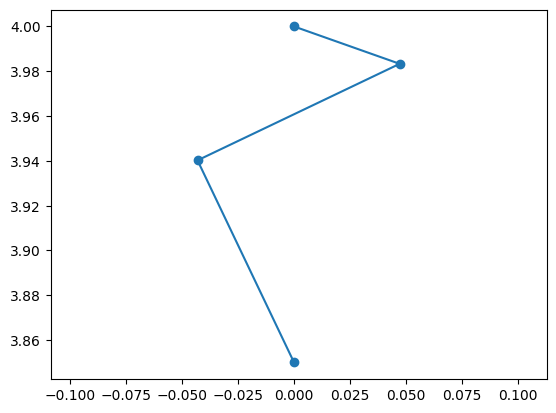

In [139]:
plt.plot(points[:, 0], points[:, 1], 'o-', label="Robot Links")
plt.axis('equal')

In [140]:
J = pe.jacobian(sp.Matrix([q1,q2]))
state = {}
state[q1] = 14.48*math.pi/180 #launch
state[q2] = 104.4*math.pi/180 #launch
J.subs(state)

Matrix([
[ -0.148363095084863,  -0.135860993008469],
[-0.0876773902239208, -0.0392656411987986],
[                  0,                   0]])

In [141]:
J_l = J.subs(state)
J_lt = J_l.T
J_i = J_l[:2,:]
J_i

Matrix([
[ -0.148363095084863,  -0.135860993008469],
[-0.0876773902239208, -0.0392656411987986]])

In [142]:
#set this depending on force in y direction
F = sp.Matrix([0,0.66,0]) # required force at foot in N
F

Matrix([
[   0],
[0.66],
[   0]])

In [143]:
T = J_lt*F
T

Matrix([
[-0.0578670775477877],
[-0.0259153231912071]])

In [144]:
#set this depending on desired velocity in y direction
V = sp.Matrix([0,-0.44]) #required velocity of end effector in m/s
V

Matrix([
[    0],
[-0.44]])

In [145]:
J_inv = J_i.inv()
qdot = J_i*V # joint velocity given in rads/s
qdot

Matrix([
[0.0597788369237263],
[0.0172768821274714]])

In [146]:
P_m1 = T[0]*qdot[0]
P_m2 = T[1]*qdot[1]
print(f"Power requirement at motor 1 is {P_m1} J and at motor 2 is {P_m2} J")

Power requirement at motor 1 is -0.00345922659198183 J and at motor 2 is -0.000447735984069811 J


### VALID CONFIGURATIONS FOR LINK LENGTH AND OPTIMIZATION

A simplified version of the kinematic model is made in order to sweep the possible joint lenghts which would result in the highest end effector velocity and would result in the robot having enough velocity to jump.

In order to see which lengths would give the best results we used a python code to plot the possible lengths. We have selected two parameters where we would keep the length of link 2 which is the actuaing link in the 4 bar fixed and we would change the length of link l3 and l4 would be equal to l2*m where we were trying to find the value of m which would give us the best result.

In order to achive the overcentering affect in out 4 bar mechaism we would need the link 4 to be longer than link2 and the m value would give us the optimum value of m.

from the plot we can see the place where we have high velocity in the link but these are not possible to achive as in this configuration the mechanism would just pivot and not have any strength and the configurations where the mechanism is not possible the velocity is given as 0 an is depicted by the purple region in the plot.

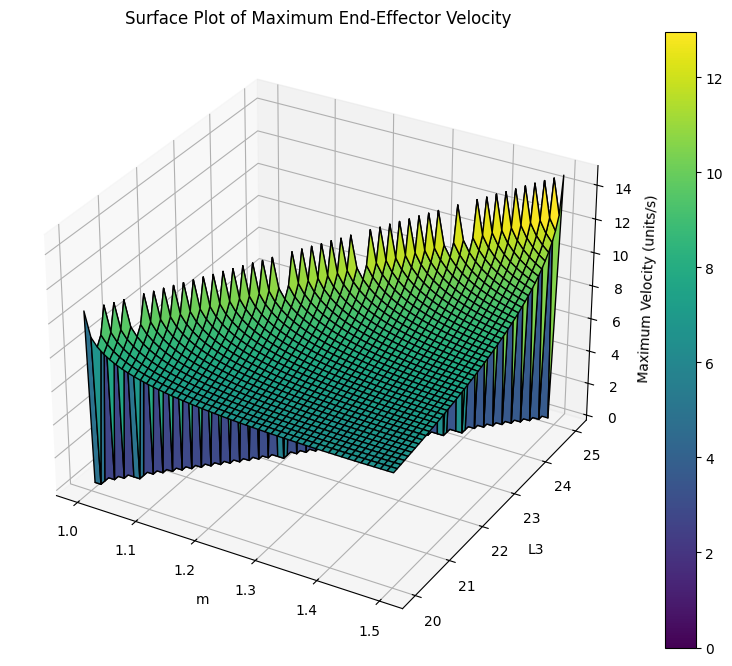

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Link lengths
L1, L2 = 20, 10  # L4 will be determined based on m (L4 = L2 * m)

# Fixed coordinates of the ground link
P1 = np.array([0, 0])
P4 = np.array([L1, 0])

# Function to calculate the mechanism configuration for a given q2, m, and L3
def four_bar_mechanism(q2_deg, m, L3):
    L4 = L2 * m  # Constraint: L4 = L2 * m
    q2 = np.radians(q2_deg)  # Convert q2 to radians

    # Check triangle inequality
    if not (L1 + L4 >= L2 + L3 and 
            L1 + (L2 + L3) >= L4 and 
            L4 + (L2 + L3) >= L1):
        return None  # Invalid configuration, skip this frame

    # Position of P2 based on L2 and q2
    P2 = P1 + np.array([L2 * np.cos(q2), L2 * np.sin(q2)])

    # Solve for P3 using the law of cosines
    # Distance between P2 and P4
    d = np.linalg.norm(P4 - P2)

    if d > L3 + L4 or d < abs(L3 - L4):
        return None  # Invalid configuration, skip this frame

    # Angle between P2 and P4
    angle_P2P4 = np.arctan2(P4[1] - P2[1], P4[0] - P2[0])

    # Using the law of cosines to find the angles
    cos_angle_3 = (d**2 + L3**2 - L4**2) / (2 * d * L3)
    if cos_angle_3 < -1 or cos_angle_3 > 1:
        return None  # Invalid configuration due to numerical issues

    angle_3 = np.arccos(cos_angle_3)

    # Calculate positions
    P3 = P2 + np.array([L3 * np.cos(angle_P2P4 - angle_3),
                        L3 * np.sin(angle_P2P4 - angle_3)])
    return P1, P2, P3, P4

# Function to calculate the velocity of the end effector (P3)
def calculate_velocity(P3, prev_P3, delta_t):
    # Calculate the change in position of P3 between the current and previous frames
    delta_P3 = P3 - prev_P3
    velocity = np.linalg.norm(delta_P3) / delta_t  # Approximate velocity by dividing by time step
    return velocity

# Loop through different values of m and L3 to find the maximum velocity
def find_max_velocity_for_m_and_L3(m_value, L3_value):
    prev_P3 = None
    max_velocity = 0
    delta_t = 0.05  # Time step between frames (you can adjust this)

    # Check the velocity for q2 values from 0 to 360 degrees
    for q2_deg in np.linspace(0, 360, 360):
        result = four_bar_mechanism(q2_deg, m_value, L3_value)
        if result is None:
            continue  # Skip invalid configurations

        P1, P2, P3, P4 = result

        if prev_P3 is not None:
            # Calculate the velocity of the end effector
            velocity = calculate_velocity(P3, prev_P3, delta_t)
            max_velocity = max(max_velocity, velocity)

        prev_P3 = P3  # Store the current P3 position for the next iteration

    return max_velocity

# Values for m (from 1 to 1.5) and L3 (from 20 to 25)
m_values = np.linspace(1, 1.5, 50)  # 50 values of m between 1 and 1.5
L3_values = np.linspace(20, 25, 50)  # 50 values of L3 between 20 and 25

# Create a meshgrid for m and L3
M, L3_grid = np.meshgrid(m_values, L3_values)

# Initialize an array to store the maximum velocities
max_velocities = np.full(M.shape, np.nan)  # Initialize with NaN for invalid configurations

# Calculate the maximum velocity for each combination of m and L3
for i in range(len(L3_values)):
    for j in range(len(m_values)):
        max_velocities[i, j] = find_max_velocity_for_m_and_L3(m_values[j], L3_values[i])

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M, L3_grid, max_velocities, cmap='viridis', edgecolor='k')

# Labels and title
ax.set_xlabel('m')
ax.set_ylabel('L3')
ax.set_zlabel('Maximum Velocity (units/s)')
ax.set_title('Surface Plot of Maximum End-Effector Velocity')

# Show color bar
fig.colorbar(surf)

# Show the plot
plt.show()


### SIMULATING 4 BAR LEG IN SOLIDWORKS

In order to simulate the end effector and observe the velocit the 4 bar mechanism is able to achieve we used the solidworks motion simulation tool box. In which we have created links as sketch blocks and used the layout feature in solidworks to simulate moving links.
Through this we were able to identify that our 4bar mechanism is able to reach the desired velocity with the link lengths as chosen from the above plot.

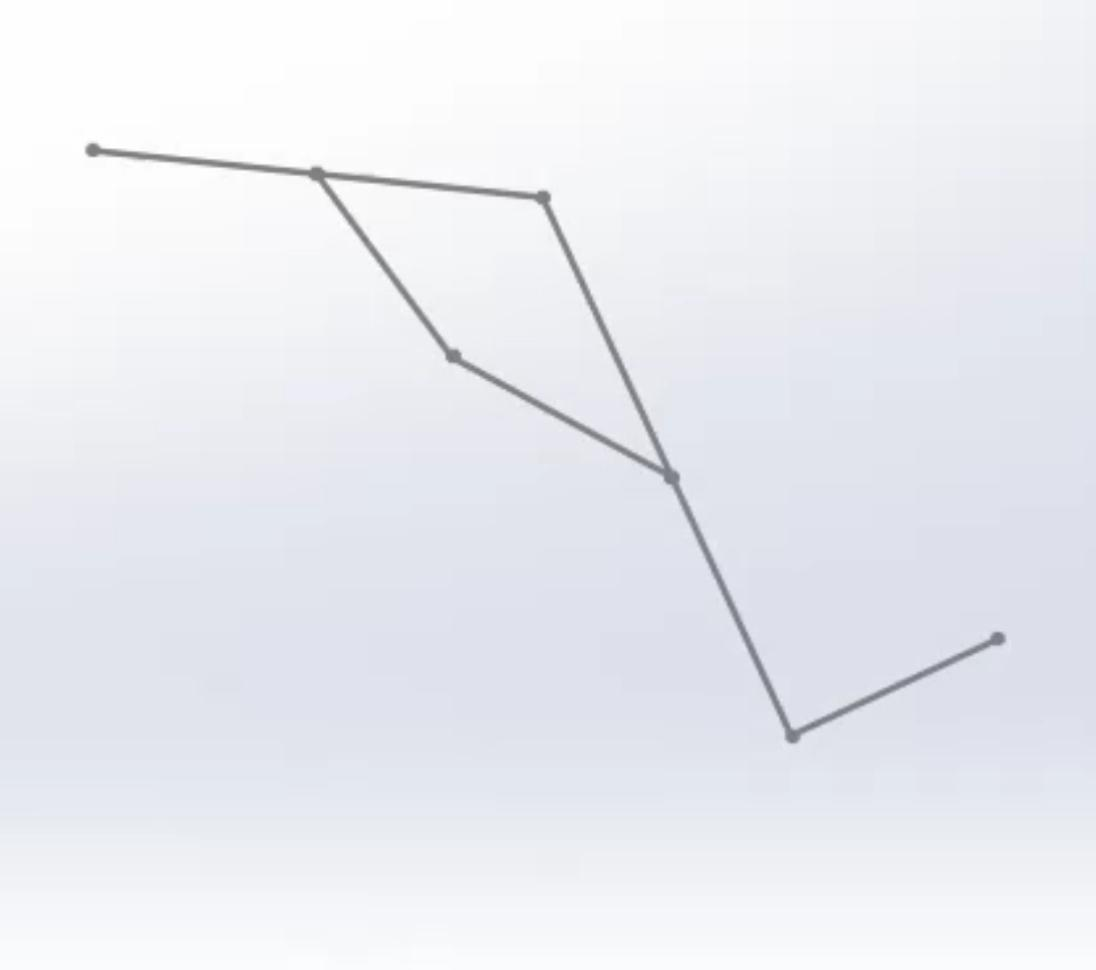

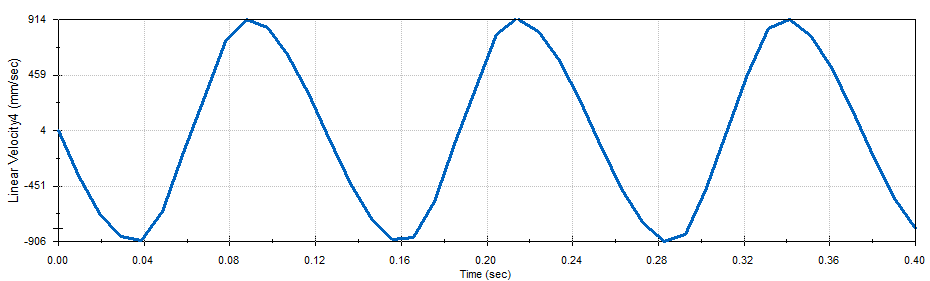

We see that the end effector is able to achive a velocity of 0.906m/s in the vertical Y direction which should be enough for the robot to jump from our initial calculations.

### Motion capture of end effector velocity

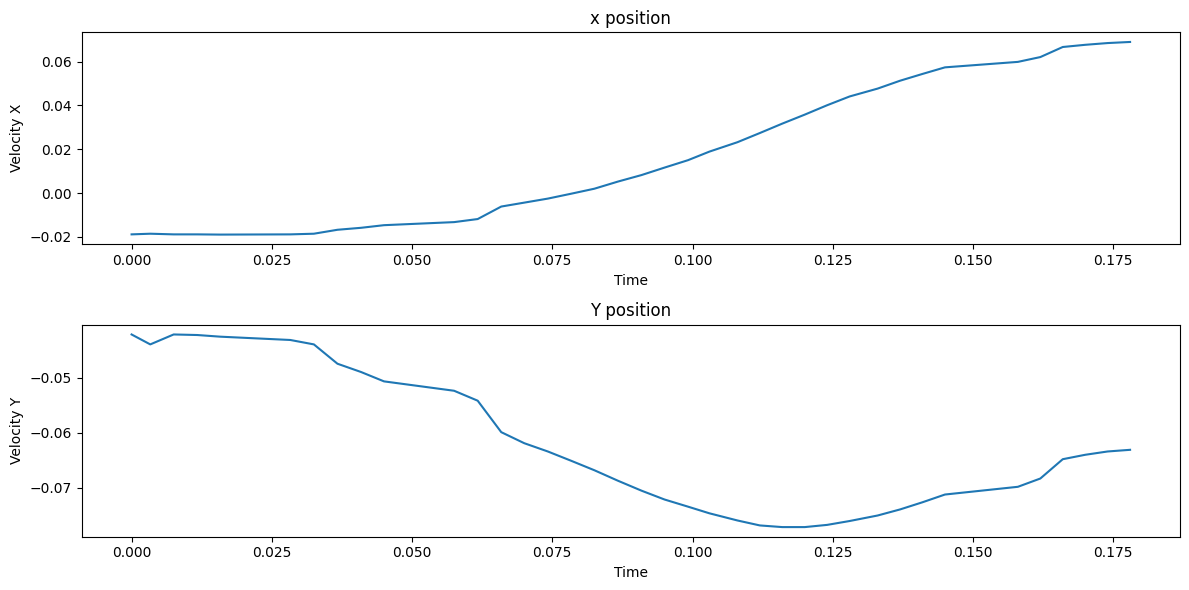

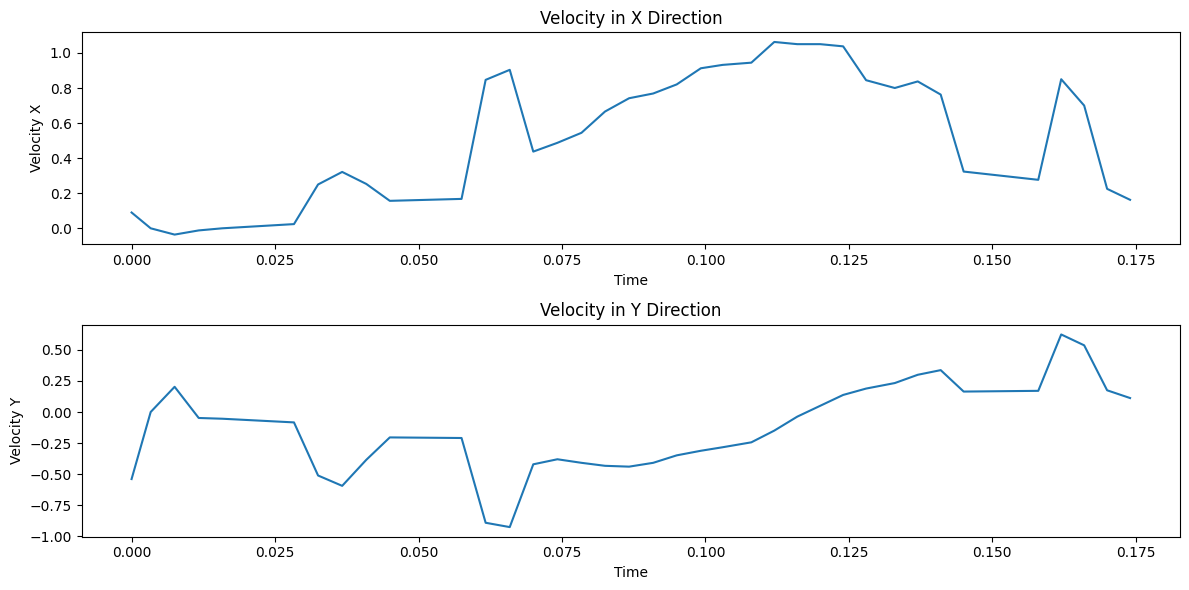

Velocity X Statistics:
Mean: nan
Max: nan

Velocity Y Statistics:
Mean: nan
Max: nan


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
data = pd.read_csv('leg_mocap.csv')
t = data['t'].values
x = data['x'].values
y = data['y'].values

# Calculate velocities using central difference method
def calculate_velocity(t, position):
    """
    Calculate velocity using central difference method.
    First and last points use forward and backward differences respectively.
    """
    vx = np.zeros_like(position)
    
    # Forward difference for first point
    vx[0] = (position[1] - position[0]) / (t[1] - t[0])
    
    # Central difference for middle points
    for i in range(1, len(position) - 1):
        vx[i] = (position[i+1] - position[i-1]) / (t[i+1] - t[i-1])
    
    # Backward difference for last point
    vx[-1] = (position[-1] - position[-2]) / (t[-1] - t[-2])
    
    return vx

plt.figure(figsize=(12, 6))
# Pos x subplot
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('x position')
plt.xlabel('Time')
plt.ylabel('Velocity X')

# Pos y subplot
plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.title('Y position')
plt.xlabel('Time')
plt.ylabel('Velocity Y')
plt.tight_layout()
plt.show()

# Calculate velocities
vx = calculate_velocity(t, x)
vy = calculate_velocity(t, y)

# Create subplots
plt.figure(figsize=(12, 6))

# Velocity x subplot
plt.subplot(2, 1, 1)
plt.plot(t, vx)
plt.title('Velocity in X Direction')
plt.xlabel('Time')
plt.ylabel('Velocity X')

# Velocity y subplot
plt.subplot(2, 1, 2)
plt.plot(t, vy)
plt.title('Velocity in Y Direction')
plt.xlabel('Time')
plt.ylabel('Velocity Y')

plt.tight_layout()
plt.show()

# Optional: Print some basic statistics about velocities
print("Velocity X Statistics:")
print(f"Mean: {np.mean(vx)}")
print(f"Max: {np.max(vx)}")


# The max velocity in the case of y was in the negative direction due to 
# the leg moving downwards in the y direction acording to the axis set in the tracker software
print("\nVelocity Y Statistics:")
print(f"Mean: {np.mean(vy)}")
print(f"Max: {np.min(vy)}")

### ROBOT CODE - SERVO

from machine import Pin, PWM
from time import sleep

frequency = 50
time_delay = 1

pos_1_r1 = 35
pos_2_r1 = 0
pos_1_r2 = 35
pos_2_r2 = 0

duty_1_r1 = int((pos_1_r1 / 180) * (128 - 28) + 28)  # Map angle to duty cycle
duty_2_r1 = int((pos_2_r1 / 180) * (128 - 28) + 28)  # Map angle to duty cycle
duty_1_r2 = int((pos_1_r2/ 180) * (128 - 28) + 28)  # Map angle to duty cycle
duty_2_r2 = int((pos_2_r2 / 180) * (128 - 28) + 28)  # Map angle to duty cycle

servo1 = PWM(Pin(13), frequency)
servo2 = PWM(Pin(14), frequency)

while True:
    servo1.duty(duty_1_r1)
    servo2.duty(duty_2_r2)
    sleep(time_delay)
    
    servo1.duty(duty_2_r1)
    servo2.duty(duty_1_r2)
    sleep(time_delay)

### MUJOCO SIMULATION

In [149]:
import os
import mujoco
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import math

Below are the optimal link lengths found.

In [150]:
l1 = 0.010
l2 = 0.0335
l3 = 0.010
l4 = 0.020
l1l2 = l1+l2
l3l4 = l3+l4

#### XML CODE:
The code involves a body and two seperate four bar mechanism mimicking our design of the legs . the link 1 is attached to the body and leg link 2 is our primary link making contact with the ground (green) the effect that the link length has in the height and displacemnet  of the robot is studied in this simulation. the optimal link lengths are presented above with l1,l2,l3 being the links needed to control leglink4 and the leg link4 being tested. the xml code below is a template which can be used to vary any of the link lenghts without affecting the structure of the leg. 2 motors are attached to both leglink1 and leglink3. all the links are connected to each other using a hinge joint except for leglin4 and leglink2 which is welded together.

In [151]:
xml_template = """<mujoco>

    <option gravity="0 0 -9.81"/>
    <option><flag contact = "enable"/></option>
    <compiler angle="degree"/>
    <visual>
        <global offwidth="800" offheight="600"/>
    </visual> 

    <default>
<geom  condim="3" friction=".6 .3 .3"
solimp=".999 .999 .001" solref=".001 1" margin="0.001" group="0"/>
</default>
    <worldbody>
    <light name = "top" pos = "0 0 1"/>
        <body name="floor" pos="0 0 0">
            <geom name="floor" pos="0 0 0" size="1 1 0.05" type="plane" rgba="1 0.83 0.61 0.5"/>
        </body>
      
      <body name = "main_body" pos = "0 0.01 0.07" axisangle = "0 1 0 0">
      <joint type = "free"/>
      <geom name = "main_body" pos = "0 0 0" type = "box" size = "0.05 0.03 0.005" rgba = "0 1 1 1" contype = "1" conaffinity ="2" mass = "0.0001"/>

     <body name = "leg_link1" pos = "0 0.04 0" axisangle = "0 1 0 60">
      <joint name = "J1" type = "hinge" axis = "0 1 0" stiffness = "1e-2" damping = "1e-4" limited = "true" range = "0 1" pos = "0 0 0" />
      <geom name = "leg_link1" pos= "0 0 0" size = "{l1} .010 .002" type= "box" rgba="1 0 0 1" mass = ".001" contype = "1" conaffinity = "2"/>


      <body name = "leg_link2" pos = "0 0 0" axisangle = "0 1 0 0">
      <joint name = "J2" type = "hinge" axis = "0 1 0"  stiffness = "1e-2" limited = "true" range = "0 30"damping = "1e-2" pos = "{l1} 0 0"/>
      <site name = "t2"  pos = "0.037 0 -0.002" size = "0.005" />
      <geom name = "leg_link2" pos = "{l1l2} 0 0" size = " {l2} 0.010 .002" type = "box" rgba = "0 1 0  1" mass = ".001" contype = "1" conaffinity = "2"/>

      

      
      
      </body>
    <body name = "leg_link3" pos = "0 0 0" axisangle = "0 1 0 0">
    
    <joint name = "J3" type= "hinge" axis = "0 1 0" stiffness = "1e-3" damping = "1e-3" pos = "-{l1} 0 -0.002" limited = "true" range = "0 30"/>
    <geom name = "leg_link3" type = "box" pos = "0 0 -0.004" size = "{l3} 0.010 0.002" mass = "0.001" rgba = "0 0 1 1" contype = "1" conaffinity = "2" />
    
    <body name = "leg_link4" pos = "0 0 0" axisangle = "0 1 0 0">
    <site name = "t4" pos = "{l3l4} 0 -0.005" size = "0.005" />
    <joint name = "J4" type= "hinge" axis = "0 1 0" stiffness = "1e-3" damping = "1e-4" pos = "{l3} 0 0"/>
    <geom name = "leg_link4" type = "box" pos = "{l3l4} 0 -0.004" size = "{l4} 0.010 0.002" mass = "0.001" rgba = "1 0 1 1" contype = "2" conaffinity = "1"/>
    </body>
    </body>
 
      </body>
      





       <body name = "leg2_link1" pos = "0 -0.04 0" axisangle = "0 1 0 60">
      <joint name = "J21" type = "hinge" axis = "0 1 0" stiffness = "1e-2" damping = "1e-4" limited = "true" range = "0 1" pos = "0 0 0" />
      <geom name = "leg21_link1" pos= "0 0 0" size = "{l1} .010 .002" type= "box" rgba="1 0 0 1" mass = ".001" contype = "1" conaffinity = "2"/>


      <body name = "leg2_link2" pos = "0 0 0" axisangle = "0 1 0 0">
      <joint name = "J22" type = "hinge" axis = "0 1 0"  stiffness = "1e-2" limited = "true" range = "0 30"damping = "1e-2" pos = "{l1} 0 0"/>
      <site name = "t22"  pos = "0.037 0 -0.002" size = "0.005" />
      <geom name = "leg2_link2" pos = "{l1l2} 0 0" size = " {l2} 0.010 .002" type = "box" rgba = "0 1 0  1" mass = ".001" contype = "1" conaffinity = "2"/>

      

      
      
      </body>
    <body name = "leg2_link3" pos = "0 0 0" axisangle = "0 1 0 0">
    
    <joint name = "J23" type= "hinge" axis = "0 1 0" stiffness = "1e-3" damping = "1e-3" pos = "-{l1} 0 -0.002" limited = "true" range = "0 30"/>
    <geom name = "leg2_link3" type = "box" pos = "0 0 -0.004" size = "{l3} 0.010 0.002" mass = "0.001" rgba = "0 0 1 1" contype = "1" conaffinity = "2" />
    
    <body name = "leg2_link4" pos = "0 0 0" axisangle = "0 1 0 0">
    <site name = "t24" pos = "{l3l4} 0 -0.005" size = "0.005" />
    <joint name = "J24" type= "hinge" axis = "0 1 0" stiffness = "1e-3" damping = "1e-4" pos = "{l3} 0 0"/>
    <geom name = "leg_link24" type = "box" pos = "{l3l4} 0 -0.004" size = "{l4} 0.010 0.002" mass = "0.001" rgba = "1 0 1 1" contype = "2" conaffinity = "1"/>
    </body>

    </body>
    </body>



    <body name = "tail" pos = "0 0 0" axisangle = "0 1 0 180">
    <geom name = "tail" pos = "0.05 0 0.035" type = "box" size = "0.001 0.001 0.025" mass = "0.001"/>
    </body>
     </body> 
      <body></body>
       
    </worldbody>

<actuator>

<motor name = "test" joint = "J3"/>
<motor name = "test2" joint = "J23"/>
<motor name = "test3" joint = "J1"/>
<motor name = "test4" joint ="J21" />

</actuator>
<equality>

<weld site1 = "t4" site2 = "t2"  solimp="0.9 0.95 0.001" solref="0.02 1"/>
<weld site1 = "t24" site2 = "t22"  solimp="0.9 0.95 0.001" solref="0.02 1"/>


</equality>
</mujoco>

"""

wos = """<!--<joint name = "J1" type = "hinge" axis = "0 1 0" limited = "true" range = "0 180" pos = "-.010 0 0" />--!>"""

In [152]:

Vnom = 6
R = Vnom/0.6
G = 55.5
t_stall = 15/100/G
i_stall = 0.6
i_nl = 0.2
O_nl = 0.66*1000*2*math.pi/180*G
Kt = t_stall/i_stall
b_calc = Kt*i_nl/O_nl
ts = 1e-4
v_control = 5
b_fit = 1.404e-6
Kp_fit = 8.896
Ke = Kt


The duration of the video the framerate data rate and all the properties relating to the duration of the simulation is given here

In [153]:

duration = 10
framerate = 30
frames = []

framerate = 30
data_rate = 100
width = 800
height = 600


This is the function which will take different values such as l1,l2,l3 and l5 and provide us the simulation of the robot. this function allows us to run the simulation dynamically without having to type it out over and over again

In [154]:
def run_sim(l1,l2,l3,l4,render = False):
    xml = xml_template.format(l1=l1 ,l2=l2  , l3=l3  , l4=l4,l1l2 = l1+l2, l3l4=l3+l4)
    print("{0} , {1} , {2} , {3}".format(l1,l2,l3,l4))
    model = mujoco.MjModel.from_xml_string(xml)
    data = mujoco.MjData(model)
    renderer = mujoco.Renderer(model ,width = width , height = height)
    
  
    def my_controller(model , data):
        w = data.qvel[0]
        actual = data.qpos[2]
    
        torque = 0.03
        if data.time < 5:
            torque = 0.01
        else:
            torque = -0.01
        
       
       # 0 and 1 control blue links 2 and 3 controls red 
        torque
        
        data.ctrl[0]= torque
        data.ctrl[1] = torque
        return
    try:
        mujoco.set_mjcb_control(my_controller)
        duration = 10
        frames = []
        t = []
        xy = []
        mujoco.mj_resetData(model,data)
        while data.time < duration:
            mujoco.mj_step(model,data)
            if render:
                if len(frames)<data.time*framerate:
                    renderer.update_scene(data)
                    pixels = renderer.render()
                    frames.append(pixels)
            if len(xy)<data.time*data_rate:
                t.append(data.time)
                xy.append(data.xpos.copy())
        
        
        
        if render:
            media.show_video(frames,fps = framerate, width = width , height = height,codec = 'gif')
        t  = np.array(t)
        xy = np.array(xy)
    finally:
        mujoco.set_mjcb_control(None)
        print("done")
    return t,xy,frames , data 

The simulation of the robot starts with the robot stretching out its limbs and the closing them rapidly to produce a forward thrust that makes the robot perform a tiny hop towards the front. the green link (leg link4) provides the thrust required to propel the robot forward

0.01 , 0.0335 , 0.01 , 0.02



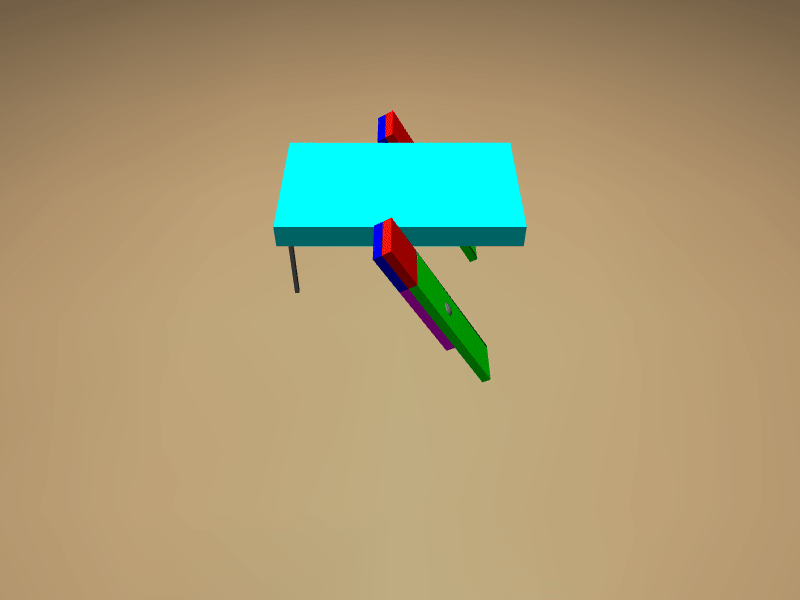

done


In [155]:
t, xy,frames, data = run_sim(l1,l2,l3,l4,True)

In [156]:
print("{0} , {1} , {2} , {3}".format(l1,l2,l3,l4))

0.01 , 0.0335 , 0.01 , 0.02


In [157]:
xy[:,2,2]

array([0.07      , 0.07080357, 0.07154265, ..., 0.06402088, 0.06399469,
       0.06403544])

In [158]:
xy.shape

(1001, 13, 3)

We store the x_pos and z_pos achieved by the robot

In [159]:
z_pos = xy[:,2,2]
x_pos = xy[:,2,0]

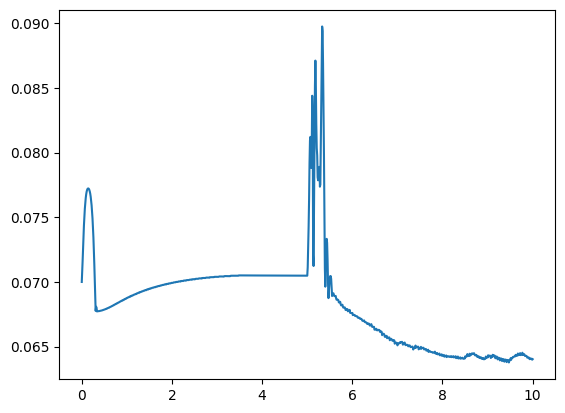

In [160]:
plt.plot(t,z_pos)

The plot above shows the height achieved by the robot during the simulation time t=10s

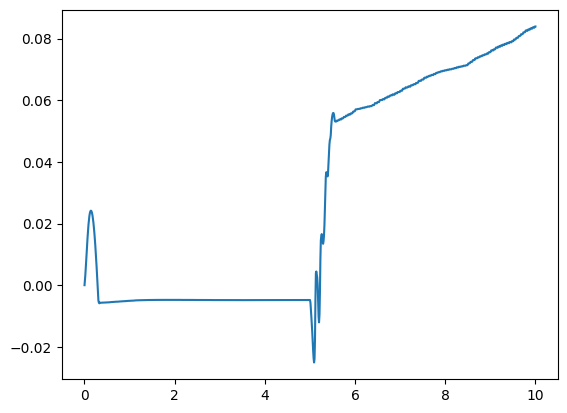

In [161]:
plt.plot(t,x_pos)

this graph shows the robots displacement along the x axis in the simulation time t=10s

The code below shows a function which takes in a range of 0.005 to 0.1 these lengths were chosen particularly to show the detrimental effects of both an extremely short leglink4 and and extremely long one. 

In [162]:
l4_range = np.arange(0.005 , 0.1 , 0.002 )
l4_range.shape
l4_range.size


48

In [163]:
def Sim_sweep(l4_range):
    x_max_pos = []
    z_max_pos = []
    for i in range(l4_range.size):
     t,xy,frames,data = run_sim(l1,l2,l3,l4_range[i] ,False)
     x_max_pos.append(np.max(xy[:,2,0]))
     z_max_pos.append(np.max(xy[:,2,2]))
    return x_max_pos , z_max_pos


We obtain the maximum displacement and maximum jump height achieved by the robot for that particular length 

In [164]:
xmp , zmp = Sim_sweep(l4_range)

0.01 , 0.0335 , 0.01 , 0.005
done
0.01 , 0.0335 , 0.01 , 0.007
done
0.01 , 0.0335 , 0.01 , 0.009000000000000001
done
0.01 , 0.0335 , 0.01 , 0.011
done
0.01 , 0.0335 , 0.01 , 0.013000000000000001
done
0.01 , 0.0335 , 0.01 , 0.015
done
0.01 , 0.0335 , 0.01 , 0.017
done
0.01 , 0.0335 , 0.01 , 0.019
done
0.01 , 0.0335 , 0.01 , 0.021
done
0.01 , 0.0335 , 0.01 , 0.023000000000000003
done
0.01 , 0.0335 , 0.01 , 0.025
done
0.01 , 0.0335 , 0.01 , 0.027
done
0.01 , 0.0335 , 0.01 , 0.029
done
0.01 , 0.0335 , 0.01 , 0.031000000000000003
done
0.01 , 0.0335 , 0.01 , 0.033
done
0.01 , 0.0335 , 0.01 , 0.034999999999999996
done
0.01 , 0.0335 , 0.01 , 0.037
done
0.01 , 0.0335 , 0.01 , 0.039
done
0.01 , 0.0335 , 0.01 , 0.041
done
0.01 , 0.0335 , 0.01 , 0.043
done
0.01 , 0.0335 , 0.01 , 0.045
done
0.01 , 0.0335 , 0.01 , 0.047
done
0.01 , 0.0335 , 0.01 , 0.048999999999999995
done
0.01 , 0.0335 , 0.01 , 0.051
done
0.01 , 0.0335 , 0.01 , 0.053
done
0.01 , 0.0335 , 0.01 , 0.055
done
0.01 , 0.0335 , 0.01 , 0.0

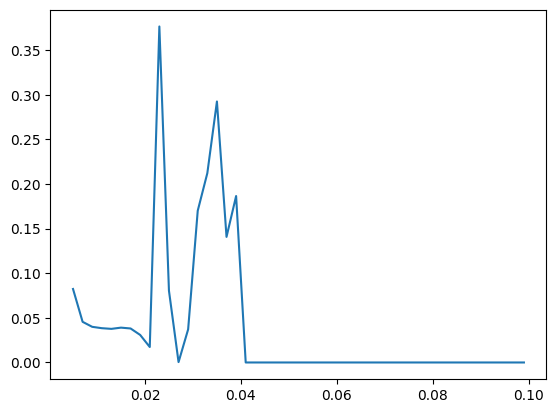

In [165]:
plt.plot(l4_range,xmp)

The plot shows the maximum dispalcement achieved by each link length from the data we can see that a length of around 0.02 achieves the maximum displacement it should be ideal but as we can see in the coming graph

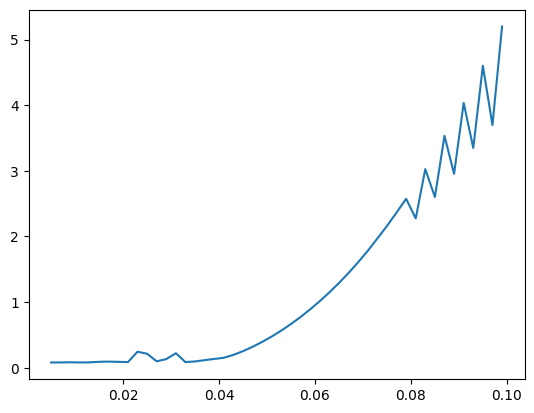

In [166]:
plt.plot(l4_range,zmp)

The height achieved by the robot is the best at 0.04 with any greater height completely prevents the robot from moving due to the link length itself affecting the height of the robot. 

With data from above we can see that the link length of 0.04 is the most ideal when it comes to getting the required height and displacement.